# OHLC와 캔들 차트

In [23]:
import pandas as pd

from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

from matplotlib import pyplot as plt
from matplotlib import dates as mdates

#구버전
from mplfinance.original_flavor import candlestick_ohlc
from datetime import datetime

#신버전
import mplfinance as mpf


In [3]:
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36'}

In [4]:
url = 'https://finance.naver.com/item/sise_day.nhn?code=068270&page=1'

In [5]:
with requests.get(url, headers=headers) as doc:
    html = BeautifulSoup(doc.text, 'lxml')
    pgrr = html.find('td', class_= 'pgRR')
    s = str(pgrr.a['href']).split('=')
    last_page = s[-1]

In [24]:
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=068270'
for page in range(1, int(last_page)+1):
    page_url = '{}&page={}'.format(sise_url, page)
    df = df.append(pd.read_html(requests.get(page_url, headers=headers).text)[0])

In [7]:
df = df.dropna()
df = df.iloc[0:30]
df = df.sort_values(by='날짜')

In [9]:
df.reset_index(drop=True)

,날짜,종가,전일비,시가,고가,저가,거래량
0,2021.08.03,265000.0,1500.0,263500.0,265000.0,260500.0,279936.0
1,2021.08.04,269500.0,4500.0,265000.0,272500.0,264500.0,497787.0
2,2021.08.05,269000.0,500.0,270000.0,275000.0,268500.0,411854.0
3,2021.08.06,271500.0,2500.0,271000.0,273000.0,267500.0,332369.0
4,2021.08.09,266000.0,5500.0,270500.0,271000.0,264500.0,351775.0
5,2021.08.10,270000.0,4000.0,266500.0,272000.0,266000.0,459924.0
6,2021.08.11,283000.0,13000.0,272000.0,286000.0,270500.0,1870984.0
7,2021.08.12,281500.0,1500.0,288500.0,291000.0,280000.0,1067756.0
8,2021.08.13,275500.0,6000.0,284000.0,286500.0,274500.0,805209.0
9,2021.08.17,274000.0,1500.0,274000.0,283000.0,271000.0,785917.0


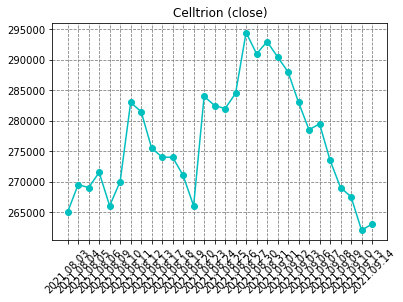

In [12]:
plt.title('Celltrion (close)')
plt.xticks(rotation=45)
plt.plot(df['날짜'], df['종가'], 'co-')
plt.grid(color='gray', linestyle='--')
plt.show()

## 4.4.3

#### 구버전 캔들

In [18]:
for idx in range(0, len(df)):
    dt = datetime.strptime(df['날짜'].values[idx], '%Y.%m.%d').date()
    df['날짜'].values[idx] = mdates.date2num(dt)
    
ohlc = df[['날짜','시가','고가','저가', '종가']]

In [19]:
ohlc

,날짜,시가,고가,저가,종가
13,18842,263500.0,265000.0,260500.0,265000.0
12,18843,265000.0,272500.0,264500.0,269500.0
11,18844,270000.0,275000.0,268500.0,269000.0
10,18845,271000.0,273000.0,267500.0,271500.0
9,18848,270500.0,271000.0,264500.0,266000.0
5,18849,266500.0,272000.0,266000.0,270000.0
4,18850,272000.0,286000.0,270500.0,283000.0
3,18851,288500.0,291000.0,280000.0,281500.0
2,18852,284000.0,286500.0,274500.0,275500.0
1,18856,274000.0,283000.0,271000.0,274000.0


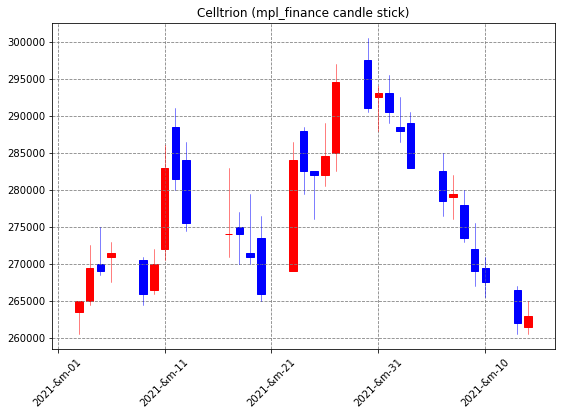

In [21]:
plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
plt.title('Celltrion (mpl_finance candle stick)')
candlestick_ohlc(ax, ohlc.values, width=0.7, colorup='red', colordown='blue')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-&m-%d'))
plt.xticks(rotation=45)
plt.grid(color='gray', linestyle='--')
plt.show()

In [22]:
mdates.DateFormatter('%Y-&m-%d')

#### 신버전 캔들

In [26]:
df = df.dropna()
df = df.iloc[0:30]
df = df.rename(columns={'날짜':'Date', '시가':'Open', '고가':'High','저가' :'Low', '종가':'Close','거래량':'Volume'})

df = df.sort_values(by='Date')
df.index = pd.to_datetime(df.Date)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

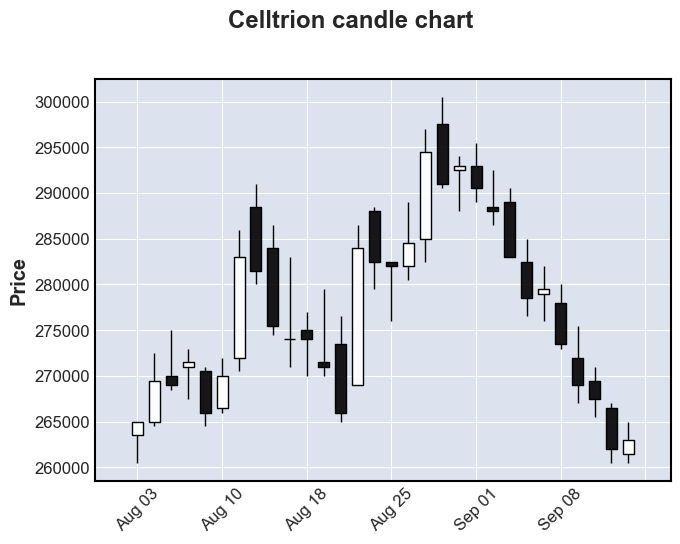

In [27]:
mpf.plot(df, title='Celltrion candle chart', type='candle')

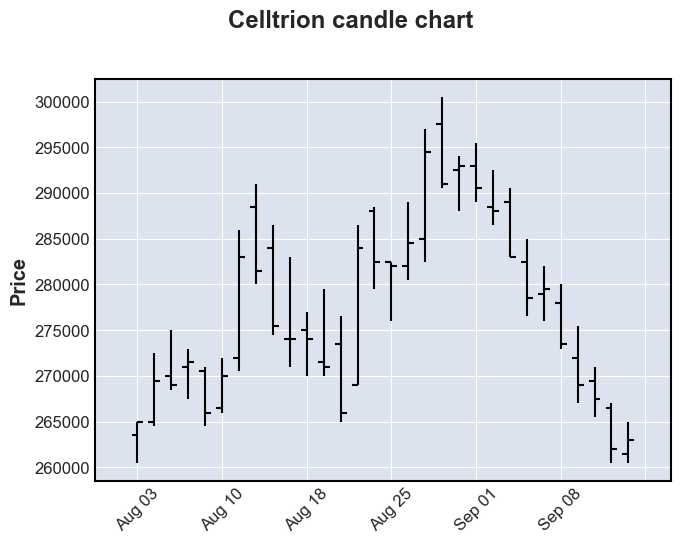

In [29]:
mpf.plot(df, title='Celltrion candle chart', type='ohlc')

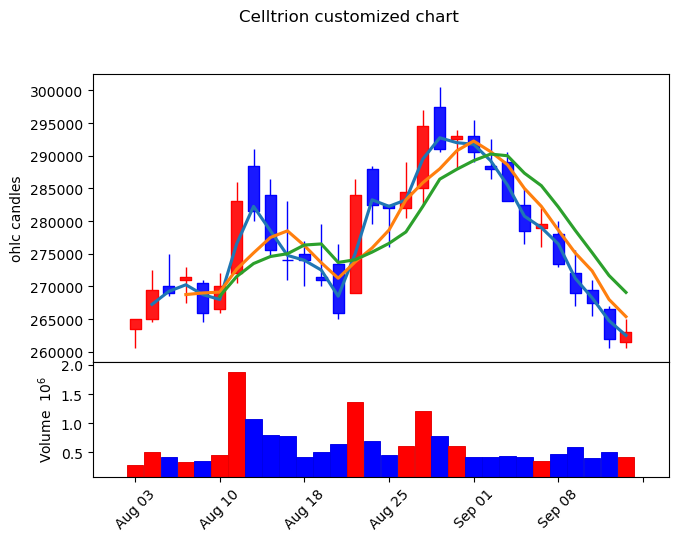

In [31]:
kwargs = dict(title='Celltrion customized chart', type='candle', mav=(2, 4, 6), volume=True, ylabel='ohlc candles')
mc = mpf.make_marketcolors(up='r', down='b', inherit=True)
s = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(df, **kwargs, style=s)